In [1]:
# Loading dependencies.
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import linregress
import requests
import time


In [2]:
# Path to csv.
card_fraud_path_load = Path("resource/credit_card_fraud.csv")
card_data = pd.read_csv(card_fraud_path_load)
card_data.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [3]:
# General info on data.
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

In [4]:
# Counted how many (potential) fraud or valid transactions there are in the data.
fraud_data = card_data[card_data['Fraud Flag or Label'] == 1]
fraud_data_count = len(fraud_data)
valid_data_row = card_data[card_data['Fraud Flag or Label'] == 0]
valid_data_count = len(valid_data_row)
print(f"There are {fraud_data_count} fraud or flag or labeled transactions in the dataset.")
print(f"There are {valid_data_count} valid transactions in the dataset.")

There are 3989 fraud or flag or labeled transactions in the dataset.
There are 4011 valid transactions in the dataset.


In [5]:
card_data['Cardholder Name'].value_counts()

Cardholder Name
Diya Rajagopalan       3
Trisha Ghose           3
Eva Balasubramanian    3
Mamooty Chaudhuri      3
Uthkarsh Soman         3
                      ..
Madhup Rajagopal       1
Azad Yadav             1
Mahika Edwin           1
Arhaan Soman           1
Alia Bose              1
Name: count, Length: 7651, dtype: int64

In [6]:
# Cardholder names that has fraud or flag or labeled transactions. (more than 1 means multiple transactions.)
fraudulent_cardholder = fraud_data.groupby(['Cardholder Name']).size()
fraudulent_cardholder.sort_values(ascending=False)

Cardholder Name
Tiya Dugar       3
Arhaan Kata      2
Gatik Sethi      2
Dhanuk Sekhon    2
Dhanuk Doshi     2
                ..
Hiran Talwar     1
Hiran Tandon     1
Hridaan Bains    1
Hridaan Brar     1
Zoya Yadav       1
Length: 3900, dtype: int64

In [7]:
# Checking to see if there is any null value in the column.
card_data['Transaction Date and Time'].isnull().sum()

0

In [8]:
# Formatted the column into a date form.
card_data_transaction_date = pd.to_datetime(card_data['Transaction Date and Time'], format ='%Y-%m-%d %H:%M:%S')
card_data_expiration_date = pd.to_datetime(card_data['Card Expiration Date'], format='%m/%y')

card_data_transaction_date.head()

0   2022-09-24 13:54:27
1   2020-07-24 11:20:13
2   2023-03-18 01:05:36
3   2021-01-07 21:53:04
4   2021-12-16 06:22:24
Name: Transaction Date and Time, dtype: datetime64[ns]

In [17]:
# Create a copy of the fraudulent transactions data
fraud_data = card_data[card_data['Fraud Flag or Label'] == 1].copy()

# Convert the 'Transaction Date and Time' column to datetime
fraud_data['Transaction Date and Time'] = pd.to_datetime(fraud_data['Transaction Date and Time'], format ='%Y-%m-%d %H:%M:%S')

# Extract the month and hour from the transaction date
fraud_data['Month'] = fraud_data['Transaction Date and Time'].dt.month
fraud_data['Hour'] = fraud_data['Transaction Date and Time'].dt.hour

# Group by month & hour and count the number of transactions
fraud_transactions_per_month = fraud_data.groupby('Month').size()
fraud_transactions_per_hour = fraud_data.groupby('Hour').size()


In [10]:
# Seperated all the date data into 'year', 'month', 'day'.
card_data_transaction_year = card_data_transaction_date.dt.year
card_data_transaction_month = card_data_transaction_date.dt.month
card_data_transaction_day = card_data_transaction_date.dt.day

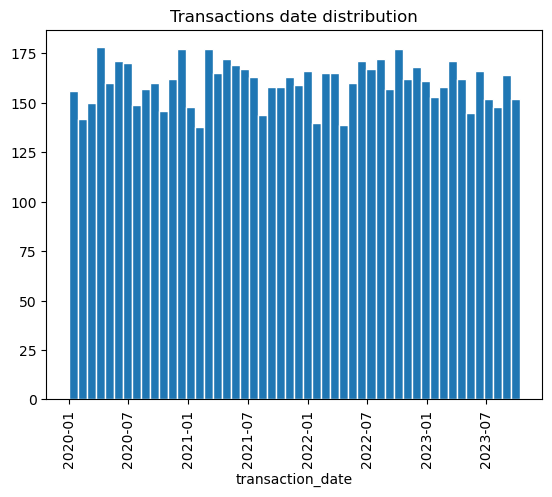

In [11]:
# Histogram for transaction date distribution.
plt.hist(card_data_transaction_date, bins=50, edgecolor='white')
plt.title("Transactions date distribution")
plt.xlabel("transaction_date")
plt.xticks(rotation=90, ha='center')
plt.show()

In [12]:
# Created new columns regarding year.
transactions_per_year = card_data.groupby(card_data_transaction_year).size()
transactions_per_year = transactions_per_year.reset_index()
transactions_per_year.columns = ['Year', 'Transaction per year']
transactions_per_year


,Year,Transaction per year
0,2020,2114
1,2021,2137
2,2022,2134
3,2023,1615


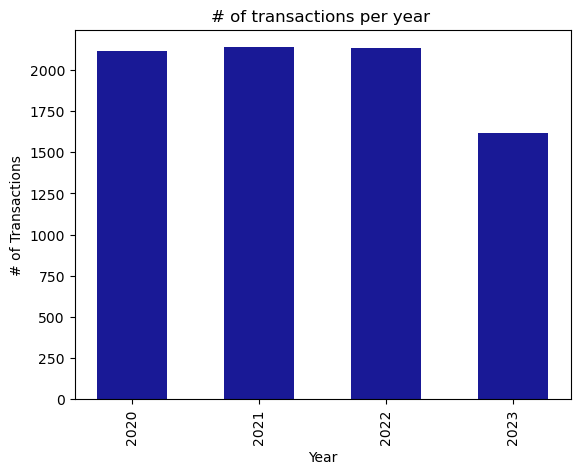

In [13]:
# Created bar graph to show transactions per year.
x_axis = transactions_per_year['Year']
y_axis = transactions_per_year['Transaction per year']

tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.bar(x_axis, y_axis, color="darkblue", alpha=0.9, align="center", width=0.55)
plt.xticks(tick_locations, rotation=90, ha='center')
plt.title("# of transactions per year ")
plt.xlabel("Year")
plt.ylabel("# of Transactions")
plt.show()

In [14]:
# Created new columns regarding month.
transactions_per_month = card_data.groupby(card_data_transaction_month).size()
transactions_per_month = transactions_per_month.reset_index()
transactions_per_month.columns = ['Month', 'Transactions per month']
transactions_per_month

,Month,Transactions per month
0,1,672
1,2,634
2,3,747
3,4,670
4,5,743
5,6,721
6,7,710
7,8,710
8,9,721
9,10,569


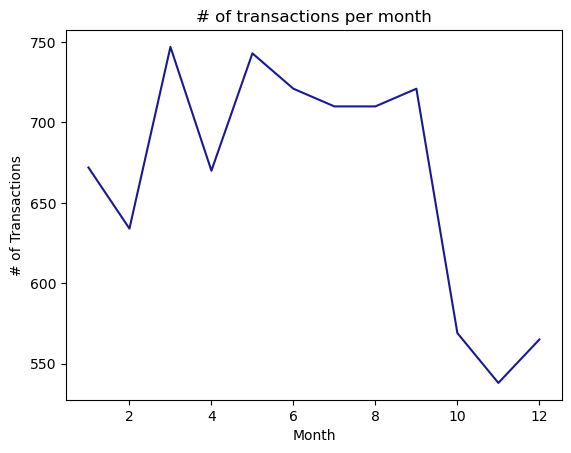

In [15]:
# Created bar graph to show transactions per month. (1 = January)
x_axis = transactions_per_month['Month']
y_axis = transactions_per_month['Transactions per month']

plt.plot(x_axis, y_axis, color="darkblue", alpha=0.9)
plt.title("# of transactions per month")
plt.xlabel("Month")
plt.ylabel("# of Transactions")
plt.show()

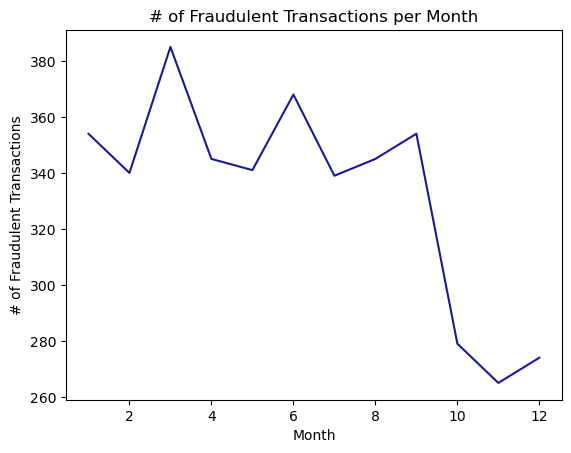

In [16]:
# Plot the number of fraudulent transactions per month
x_axis = fraud_transactions_per_month.index
y_axis = fraud_transactions_per_month.values

plt.plot(x_axis, y_axis, color="darkblue", alpha=0.9)
plt.title("# of Fraudulent Transactions per Month")
plt.xlabel("Month")
plt.ylabel("# of Fraudulent Transactions")
plt.show()

The r_value is -0.10363949095106406


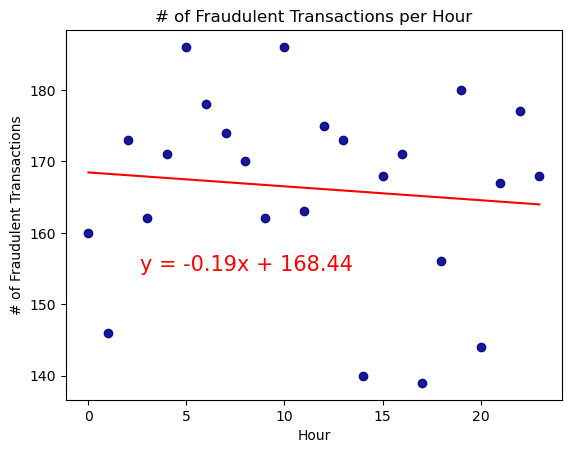

In [36]:
x_axis = fraud_transactions_per_hour.index
y_axis = fraud_transactions_per_hour.values

(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, color="darkblue", alpha=0.9)
plt.plot(x_axis, intercept + slope*x_axis, 'r', label='fitted line')
plt.annotate(line_eq, xy=(0.15, 0.35), xycoords='axes fraction', fontsize=15, color="red")
plt.title("# of Fraudulent Transactions per Hour")
plt.xlabel("Hour")
plt.ylabel("# of Fraudulent Transactions")
print(f"The r_value is {r_value}")
plt.show()


